In [115]:
import numpy as np
import pandas as pd
import math
import matplotlib.pyplot as plt
import scipy.signal

In [116]:
#read data files from .csv formats

current = pd.read_csv('Files/current.csv',header=None)
date = pd.read_csv('Files/date.csv',header=None)
date_file = pd.read_csv('Files/date_file.csv',header=None)
hour = pd.read_csv('Files/hour.csv',header=None)
hour_file = pd.read_csv('Files/hour_file.csv',header=None)
length = pd.read_csv('Files/length.csv',header=None)
minute = pd.read_csv('Files/minute.csv',header=None)
minute_file = pd.read_csv('Files/minute_file.csv',header=None)
month = pd.read_csv('Files/month.csv',header=None)
month_file = pd.read_csv('Files/month_file.csv',header=None)
nodeID = pd.read_csv('Files/nodeID.csv',header=None)
second = pd.read_csv('Files/second.csv',header=None)
second_file = pd.read_csv('Files/second_file.csv',header=None)
voltage = pd.read_csv('Files/voltage.csv',header=None)
year = pd.read_csv('Files/year.csv',header=None)
year_file = pd.read_csv('Files/year_file.csv',header=None)

# load individual data.txt files

accel = []
for i in range(4239):
    d = pd.read_csv('Data/data' + str(i + 1) + '.txt',header=None,names=['x','y','z'])
    accel.append(d)
    
bridges = {122.4: [2,3,4,5], 121.7: [6,7,8,9]}

In [117]:
len(accel)

4239

In [118]:
#length: [ft]
#weight: [tons]

manifest = [
    #Scanned Document 2:
    {'cars':144,'length':9993,'weight':16022,'direction':'S','timestamp':1809191245}, #Memphis
    {'cars':147,'length':9530,'weight':10706,'direction':'N','timestamp':1809192050}, #Kiryard
    {'cars':92,'length':5970,'weight':4945,'direction':'S','timestamp':1809192209}, #MS/LA/TN
    {'cars':63,'length':4864,'weight':4868,'direction':'S','timestamp':1809192234}, #Salem
    {'cars':116,'length':7132,'weight':16915,'direction':'S','timestamp':1809192330}, #Maryland LA
    {'cars':142,'length':9940,'weight':7980,'direction':'S','timestamp':1809200142}, #Salem
    {'cars':3,'length':323,'weight':601,'direction':'S','timestamp':1809200210}, #Elkhart
    {'cars':103,'length':6879,'weight':5862,'direction':'S','timestamp':1809200212}, #TN
    {'cars':14,'length':1010,'weight':1279,'direction':'N','timestamp':1809200437}, #Gilman
    {'cars':116,'length':8370,'weight':7194,'direction':'N','timestamp':1809200541}, #CHI Intter
    {'cars':99,'length':6072,'weight':3471,'direction':'N','timestamp':1809200730}, #from Windsor
    {'cars':131,'length':7852,'weight':13574,'direction':'N','timestamp':1809200836}, #Tormacyar ON
    {'cars':152,'length':9839,'weight':12395,'direction':'N','timestamp':1809200903}, #Kiryard
    {'cars':102,'length':6349,'weight':5015,'direction':'N','timestamp':1809200917}, #Winsymyar MB
    #Scanned Document 3:
    {'cars':146,'length':8911,'weight':8960,'direction':'S','timestamp':1809201021}, #Memphis
    {'cars':108,'length':5658,'weight':3721,'direction':'N','timestamp':1809201054}, #Winsymar MB
    {'cars':106,'length':6402,'weight':13562,'direction':'S','timestamp':1809201319}, #Reserve LA
    {'cars':149,'length':9935,'weight':10611,'direction':'N','timestamp':1809202028}, #Kiryard
    {'cars':105,'length':7157,'weight':5798,'direction':'S','timestamp':1809202205}, #MS/LA
    {'cars':135,'length':8334,'weight':4387,'direction':'N','timestamp':1809202213}, #Winsymyar MB
    {'cars':113,'length':7610,'weight':8773,'direction':'S','timestamp':1809202305}, #Salem
    {'cars':114,'length':7066,'weight':5792,'direction':'N','timestamp':1809202335}, #Winsymyar MB
    {'cars':76,'length':4631,'weight':8177,'direction':'N','timestamp':1809202359}, #ON/MI
    {'cars':145,'length':8894,'weight':13213,'direction':'S','timestamp':1809210129}, #Memphis
    {'cars':120,'length':7556,'weight':7040,'direction':'S','timestamp':1809210146}, #Salem
    {'cars':153,'length':9897,'weight':8898,'direction':'S','timestamp':1809210229}, #Effingham
    {'cars':146,'length':10013,'weight':8086,'direction':'N','timestamp':1809210554}, #CHI Intter
    {'cars':107,'length':6560,'weight':13905,'direction':'S','timestamp':1809210913}, #LA
    {'cars':129,'length':9152,'weight':10183,'direction':'N','timestamp':1809210933}, #Kiryard
    {'cars':131,'length':8098,'weight':9552,'direction':'S','timestamp':1809211144}, #Memphis
    #Scanned Document 4:
    {'cars':106,'length':6443,'weight':5012,'direction':'N','timestamp':1809251048}, #Winsymyar MB
    {'cars':133,'length':8269,'weight':10413,'direction':'S','timestamp':1809281142}, #Memphis
    {'cars':71,'length':4840,'weight':5646,'direction':'S','timestamp':1809251244}, #from Toledo
    {'cars':29,'length':1630,'weight':3815,'direction':'N','timestamp':1809251446}, #Gilman
    {'cars':146,'length':9729,'weight':14391,'direction':'S','timestamp':1809251554}, #Memphis
    {'cars':27,'length':1658,'weight':2755,'direction':'N','timestamp':1809251837}, #Gilman
    {'cars':58,'length':3945,'weight':3759,'direction':'S','timestamp':1809252100}, #MS/LA/TN
    {'cars':116,'length':7084,'weight':16920,'direction':'S','timestamp':1809252146}, #LA
    {'cars':84,'length':5381,'weight':6047,'direction':'S','timestamp':1809252206}, #Salem
    {'cars':102,'length':6257,'weight':4910,'direction':'N','timestamp':1809260340}, #Winsymyar MB
    {'cars':83,'length':5154,'weight':9491,'direction':'N','timestamp':1809260537}, #Tormacyar ON
    {'cars':149,'length':9336,'weight':7032,'direction':'N','timestamp':1809260623}, #CHI Intter
    {'cars':147,'length':8948,'weight':9974,'direction':'N','timestamp':1809260746}, #Kiryard
    {'cars':99,'length':6218,'weight':6262,'direction':'S','timestamp':1809260826}, #Memintter TN
    {'cars':89,'length':5505,'weight':9029,'direction':'S','timestamp':1809260912}, #Memphis
    {'cars':89,'length':5480,'weight':3385,'direction':'S','timestamp':1809260958}, #Neoga
    {'cars':115,'length':7690,'weight':7065,'direction':'S','timestamp':1809261132}, #Memintter TN
    {'cars':53,'length':5123,'weight':7566,'direction':'N','timestamp':1809261141}, #Winsymyar MB
    #Scanned Document 5:
    {'cars':108,'length':5733,'weight':15817,'direction':'S','timestamp':1809261214}, #Mounds
    {'cars':105,'length':7032,'weight':8520,'direction':'S','timestamp':1809261303}, #Salem
    {'cars':149,'length':9132,'weight':13262,'direction':'S','timestamp':1809261414}, #Memphis
    {'cars':155,'length':9919,'weight':12299,'direction':'N','timestamp':1809261523}, #Kiryard
    {'cars':110,'length':7912,'weight':9341,'direction':'S','timestamp':1809261625}, #Memphis
    {'cars':106,'length':6124,'weight':13997,'direction':'S','timestamp':1809261730}, #Chiles KY
    {'cars':77,'length':5069,'weight':4663,'direction':'S','timestamp':1809262017}, #MS/LA/TN
    {'cars':119,'length':7196,'weight':5586,'direction':'N','timestamp':1809262031}, #Winsymyar MB
    {'cars':116,'length':7068,'weight':6603,'direction':'S','timestamp':1809262100}, #Salem
    {'cars':102,'length':6275,'weight':14989,'direction':'S','timestamp':1809262253}, #Jackson MS
    {'cars':65,'length':4074,'weight':7403,'direction':'N','timestamp':1809262304}, #Tormacyar ON
    {'cars':92,'length':6926,'weight':4326,'direction':'N','timestamp':1809262349}, #Markham
    {'cars':64,'length':3654,'weight':6015,'direction':'N','timestamp':1809270323}, #Gilman
    {'cars':88,'length':5923,'weight':5307,'direction':'N','timestamp':1809270407}, #CHI Intter
    {'cars':99,'length':6022,'weight':4465,'direction':'N','timestamp':1809270424}, #Winsymyar MB
    #Scanned Document 6:
    {'cars':126,'length':8930,'weight':12802,'direction':'S','timestamp':1809270649}, #Memphis
    {'cars':110,'length':7293,'weight':6225,'direction':'S','timestamp':1809270716}, #Memintter TN
    {'cars':140,'length':9379,'weight':8634,'direction':'N','timestamp':1809270725}, #Kiryard
    {'cars':116,'length':7108,'weight':16920,'direction':'S','timestamp':1809271106}, #Maryland LA
    {'cars':119,'length':7266,'weight':9368,'direction':'S','timestamp':1809271321}, #Memphis
    {'cars':105,'length':8321,'weight':7232,'direction':'S','timestamp':1809271502}, #Salem
    {'cars':162,'length':9708,'weight':12991,'direction':'N','timestamp':1809271635}, #Kiryard
    {'cars':25,'length':1612,'weight':3632,'direction':'S','timestamp':1809271949}, #from Gilman
    {'cars':138,'length':8851,'weight':7902,'direction':'S','timestamp':1809272020}, #MS/LA/TN
    {'cars':98,'length':6007,'weight':14331,'direction':'S','timestamp':1809272201}, #LA
    {'cars':158,'length':9970,'weight':9313,'direction':'S','timestamp':1809272248}, #Salem
    {'cars':149,'length':8829,'weight':13904,'direction':'N','timestamp':1809272353}, #Tormacyar ON
    {'cars':78,'length':5031,'weight':3747,'direction':'N','timestamp':1809280155}, #CHI Inttter
    {'cars':34,'length':1732,'weight':1372,'direction':'N','timestamp':1809280218}, #Gilman
    {'cars':125,'length':8092,'weight':7874,'direction':'N','timestamp':1809280543}, #CHI Intter
    {'cars':107,'length':5903,'weight':4535,'direction':'N','timestamp':1809280705}, #Winsymyar MB
    {'cars':155,'length':9913,'weight':12960,'direction':'N','timestamp':1809280731}, #Kiryard
    {'cars':102,'length':6354,'weight':15039,'direction':'S','timestamp':1809280805}, #LA
    {'cars':116,'length':7118,'weight':16874,'direction':'S','timestamp':1809280859}, #Maryland LA
]

datafull = pd.DataFrame(data=manifest)

In [119]:
def search_manifest(timestamp):
    for row in range(len(manifest)):
        if manifest[row]['timestamp'] - timestamp > 0:
            return row
            break

In [120]:
def find_timestamp(n):
    return minute[n][0] + 100*(hour[n][0]) + (100**2)*date[n][0] + (100**3)*month[n][0] + (100**4)*year[n][0]

In [179]:
#param timestamp: timestamp from manifest
#return: dictionary of sensor nodes that match timestamp, organized by bridge
def search(timestamp, direction):
    results = {122.4:[], 121.7:[]}
    for n in range(4239):
        t1 = find_timestamp(n)
#         if (abs(timestamp - t1) <= 15):
        if (direction == 'S') and (timestamp - t1 >= 0) and (timestamp - t1 <= 20):
            #S: 15 min before (maybe increase time)
            if (nodeID[n][0] <= 5):
                results[122.4].append(n)
            else:
                results[121.7].append(n)
        elif (direction == 'N') and (t1 - timestamp >= 0) and (t1 - timestamp <= 15):
            #N: 15 min after (maybe lower)
            if (nodeID[n][0] <= 5):
                results[122.4].append(n)
            else:
                results[121.7].append(n)
                
    return results

In [190]:
#store relevant data indices
nodes = {122.4:[], 121.7:[]}
for i in range(len(manifest)):
    direction = manifest[i]['direction']
    nodes_dict = search(manifest[i]['timestamp'],direction)
    nodes[122.4].append(nodes_dict[122.4])
    nodes[121.7].append(nodes_dict[121.7])
    
datafull['indices 122.4'] = nodes[122.4]
datafull['indices 121.7'] = nodes[121.7]

In [191]:
datafull

,cars,direction,length,timestamp,weight,indices 122.4,indices 121.7
0,144,S,9993,1809191245,16022,[],"[430, 441, 465]"
1,147,N,9530,1809192050,10706,[],[]
2,92,S,5970,1809192209,4945,"[401, 402, 403, 405]","[469, 473, 486]"
3,63,S,4864,1809192234,4868,"[410, 411, 412, 413]","[470, 478, 480, 487, 488, 489, 490]"
4,116,S,7132,1809192330,16915,"[444, 445, 446, 447]","[442, 475, 485, 502]"
5,142,S,9940,1809200142,7980,[],"[491, 492, 493, 514]"
6,3,S,323,1809200210,601,"[505, 511, 512, 515]",[]
7,103,S,6879,1809200212,5862,"[505, 511, 512, 515]",[]
8,14,N,1010,1809200437,1279,"[525, 526, 527, 528]","[529, 530, 531, 532]"
9,116,N,8370,1809200541,7194,"[533, 534, 535, 536]","[537, 538, 539]"


In [202]:
dropped = 0
data = datafull.copy()
for row in range(len(datafull)):
#     print(row)
    timestamp = datafull['timestamp'][row]
    if ((len(data['indices 122.4'][row]) < 3) or (len(data['indices 121.7'][row]) < 3)):
        data = data.drop([row])
#         row -= 1
        dropped += 1
        continue
    elif len(data['indices 122.4'][row]) > 4:
        nodes_list = []
        nodes_dict = {2:[],3:[],4:[],5:[]}
        for node in list(data['indices 122.4'][row]):
            nodes_dict[nodeID[node][0]].append(node)
        for node_no in list(nodes_dict.keys()):
            if len(nodes_dict[node_no]) == 0:
                continue
            best_match = nodes_dict[node_no][0]
            for node_i in nodes_dict[node_no]:
                if abs(find_timestamp(node_i) - timestamp) < (find_timestamp(best_match) - timestamp):
                    best_match = node_i
            nodes_list.append(best_match)
        data['indices 122.4'][row] = nodes_list
        
    if len(data['indices 121.7'][row]) > 4:
        nodes_list = []
        nodes_dict = {6:[],7:[],8:[],9:[]}
        for node in list(data['indices 121.7'][row]):
            nodes_dict[nodeID[node][0]].append(node)
        for node_no in list(nodes_dict.keys()):
            if len(nodes_dict[node_no]) == 0:
                continue
            best_match = nodes_dict[node_no][0]
            for node_i in nodes_dict[node_no]:
                if abs(find_timestamp(node_i) - timestamp) < (find_timestamp(best_match) - timestamp):
                    best_match = node_i
            nodes_list.append(best_match)
        data['indices 121.7'][row] = nodes_list
data = data.reset_index(drop=True)

/home/sanjeev/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:39: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/home/sanjeev/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


In [204]:
data.head()

,cars,direction,length,timestamp,weight,indices 122.4,indices 121.7
0,92,S,5970,1809192209,4945,"[401, 402, 403, 405]","[469, 473, 486]"
1,63,S,4864,1809192234,4868,"[410, 411, 412, 413]","[470, 487, 478]"
2,116,S,7132,1809192330,16915,"[444, 445, 446, 447]","[442, 475, 485, 502]"
3,14,N,1010,1809200437,1279,"[525, 526, 527, 528]","[529, 530, 531, 532]"
4,116,N,8370,1809200541,7194,"[533, 534, 535, 536]","[537, 538, 539]"


In [207]:
(len(datafull) - dropped) / len(datafull)
data.head()

,cars,direction,length,timestamp,weight,indices 122.4,indices 121.7
0,92,S,5970,1809192209,4945,"[401, 402, 403, 405]","[469, 473, 486]"
1,63,S,4864,1809192234,4868,"[410, 411, 412, 413]","[470, 487, 478]"
2,116,S,7132,1809192330,16915,"[444, 445, 446, 447]","[442, 475, 485, 502]"
3,14,N,1010,1809200437,1279,"[525, 526, 527, 528]","[529, 530, 531, 532]"
4,116,N,8370,1809200541,7194,"[533, 534, 535, 536]","[537, 538, 539]"


In [209]:
nodes_data = {122.4:[], 121.7:[]}
for bridge in list(nodes_data.keys()):
    for i in range (len(data)):
        d = data['indices ' + str(bridge)][i]
        nodes = []
        for node in list(d):
            nodes.append(nodeID[node][0])
        nodes_data[bridge].append(nodes)
    data['Bridge ' + str(bridge)] = nodes_data[bridge]

In [210]:
data.head()

,cars,direction,length,timestamp,weight,indices 122.4,indices 121.7,Bridge 122.4,Bridge 121.7
0,92,S,5970,1809192209,4945,"[401, 402, 403, 405]","[469, 473, 486]","[4, 3, 2, 5]","[6, 9, 7]"
1,63,S,4864,1809192234,4868,"[410, 411, 412, 413]","[470, 487, 478]","[2, 3, 4, 5]","[6, 7, 9]"
2,116,S,7132,1809192330,16915,"[444, 445, 446, 447]","[442, 475, 485, 502]","[5, 4, 3, 2]","[8, 6, 9, 7]"
3,14,N,1010,1809200437,1279,"[525, 526, 527, 528]","[529, 530, 531, 532]","[2, 3, 4, 5]","[8, 6, 7, 9]"
4,116,N,8370,1809200541,7194,"[533, 534, 535, 536]","[537, 538, 539]","[5, 4, 3, 2]","[8, 7, 6]"


In [211]:
#add columns for average, min, max of lengths
stats_data = {122.4:[], 121.7:[]}
time_data = {122.4:[], 121.7:[]}
for i in range(len(data)):
    d = data['indices 122.4'][i]
    len_data = []
    times = []
    for j in list(d):
        accel_data = accel[j]
        len_data.append(len(accel_data))
        times.append(minute[j][0] + 100*(hour[j][0]) + (100**2)*date[j][0] + (100**3)*month[j][0] + (100**4)*year[j][0])
    if (len(len_data) != 0):
        stats_data[122.4].append({'median':np.median(len_data),'mean':np.mean(len_data),'min':np.amin(len_data),'max':np.amax(len_data)})
        time_data[122.4].append(np.median(times))
    else:
        stats_data[122.4].append({})
        time_data[122.4].append([])
    
    d = data['indices 121.7'][i]
    len_data = []
    times = []
    for j in list(d):
        accel_data = accel[j]
        len_data.append(len(accel_data))
        times.append(minute[j][0] + 100*(hour[j][0]) + (100**2)*date[j][0] + (100**3)*month[j][0] + (100**4)*year[j][0])
    if (len(len_data) != 0):
        stats_data[121.7].append({'median':np.median(len_data),'mean':np.mean(len_data),'min':np.amin(len_data),'max':np.amax(len_data)})
        time_data[121.7].append(np.median(times))
    else:
        stats_data[121.7].append({})
        time_data[121.7].append([])

data['122.4 length stats'] = stats_data[122.4]
data['121.7 length stats'] = stats_data[121.7]

In [212]:
data.head()

,cars,direction,length,timestamp,weight,indices 122.4,indices 121.7,Bridge 122.4,Bridge 121.7,122.4 length stats,121.7 length stats
0,92,S,5970,1809192209,4945,"[401, 402, 403, 405]","[469, 473, 486]","[4, 3, 2, 5]","[6, 9, 7]","{'median': 10176.5, 'mean': 10190.75, 'min': 1...","{'median': 13552.0, 'mean': 13564.333333333334..."
1,63,S,4864,1809192234,4868,"[410, 411, 412, 413]","[470, 487, 478]","[2, 3, 4, 5]","[6, 7, 9]","{'median': 16889.0, 'mean': 16893.25, 'min': 1...","{'median': 4264.0, 'mean': 6751.333333333333, ..."
2,116,S,7132,1809192330,16915,"[444, 445, 446, 447]","[442, 475, 485, 502]","[5, 4, 3, 2]","[8, 6, 9, 7]","{'median': 20388.0, 'mean': 20403.5, 'min': 20...","{'median': 21514.5, 'mean': 21030.25, 'min': 1..."
3,14,N,1010,1809200437,1279,"[525, 526, 527, 528]","[529, 530, 531, 532]","[2, 3, 4, 5]","[8, 6, 7, 9]","{'median': 2492.0, 'mean': 2625.0, 'min': 2429...","{'median': 2856.0, 'mean': 2862.0, 'min': 2822..."
4,116,N,8370,1809200541,7194,"[533, 534, 535, 536]","[537, 538, 539]","[5, 4, 3, 2]","[8, 7, 6]","{'median': 19233.5, 'mean': 19242.75, 'min': 1...","{'median': 22734.0, 'mean': 22702.666666666668..."


In [213]:
data = data[['timestamp','length','weight','cars','direction','Bridge 122.4','122.4 length stats','Bridge 121.7','121.7 length stats','indices 122.4','indices 121.7']]
data.head()

,timestamp,length,weight,cars,direction,Bridge 122.4,122.4 length stats,Bridge 121.7,121.7 length stats,indices 122.4,indices 121.7
0,1809192209,5970,4945,92,S,"[4, 3, 2, 5]","{'median': 10176.5, 'mean': 10190.75, 'min': 1...","[6, 9, 7]","{'median': 13552.0, 'mean': 13564.333333333334...","[401, 402, 403, 405]","[469, 473, 486]"
1,1809192234,4864,4868,63,S,"[2, 3, 4, 5]","{'median': 16889.0, 'mean': 16893.25, 'min': 1...","[6, 7, 9]","{'median': 4264.0, 'mean': 6751.333333333333, ...","[410, 411, 412, 413]","[470, 487, 478]"
2,1809192330,7132,16915,116,S,"[5, 4, 3, 2]","{'median': 20388.0, 'mean': 20403.5, 'min': 20...","[8, 6, 9, 7]","{'median': 21514.5, 'mean': 21030.25, 'min': 1...","[444, 445, 446, 447]","[442, 475, 485, 502]"
3,1809200437,1010,1279,14,N,"[2, 3, 4, 5]","{'median': 2492.0, 'mean': 2625.0, 'min': 2429...","[8, 6, 7, 9]","{'median': 2856.0, 'mean': 2862.0, 'min': 2822...","[525, 526, 527, 528]","[529, 530, 531, 532]"
4,1809200541,8370,7194,116,N,"[5, 4, 3, 2]","{'median': 19233.5, 'mean': 19242.75, 'min': 1...","[8, 7, 6]","{'median': 22734.0, 'mean': 22702.666666666668...","[533, 534, 535, 536]","[537, 538, 539]"


In [214]:
calc_direction = []
calc_speed = []
calc_length = []
error_length = []
distance = 122.4 - 121.7
for row in range(len(data)):
    t1 = 0
    for n in data['indices 121.7'][row]:
        t1 += find_timestamp(n)
    t1 = t1 / (len(data['indices 121.7'][row]))
    
    t2 = 0
    for n in data['indices 122.4'][row]:
        t2 += find_timestamp(n)
    t2 = t2 / (len(data['indices 122.4'][row]))
    
    if t1 > t2:
        calc_direction.append('N')
    else:
        calc_direction.append('S')
        
    if (t1 != t2):    
        speed = (distance * 60) / (abs(t2 - t1))
    else:
        speed = 0;
    calc_speed.append(speed)
        
    length = ((data['122.4 length stats'][row]['median'] * speed * 5280 / (100 * 3600)) + (data['121.7 length stats'][row]['mean'] * speed * 5280 / (100 * 3600))) / 2
    calc_length.append(length)
    error_length.append((abs(length - data['length'][row])) / (data['length'][row]))

In [215]:
data['calc_direction'] = calc_direction
data['calc_speed'] = calc_speed
data['calc_length'] = calc_length
data['error_length'] = error_length
data = data[['timestamp','length','weight','cars','direction','calc_direction','calc_speed','calc_length','error_length','Bridge 122.4','122.4 length stats','Bridge 121.7','121.7 length stats', 'indices 122.4', 'indices 121.7']]
data.head(50)

/home/sanjeev/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
/home/sanjeev/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/home/sanjeev/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the do

,timestamp,length,weight,cars,direction,calc_direction,calc_speed,calc_length,error_length,Bridge 122.4,122.4 length stats,Bridge 121.7,121.7 length stats,indices 122.4,indices 121.7
0,1809192209,5970,4945,92,S,S,42.0,7312.176667,0.224820,"[4, 3, 2, 5]","{'median': 10176.5, 'mean': 10190.75, 'min': 1...","[6, 9, 7]","{'median': 13552.0, 'mean': 13564.333333333334...","[401, 402, 403, 405]","[469, 473, 486]"
1,1809192234,4864,4868,63,S,S,9.0,1560.261973,0.679222,"[2, 3, 4, 5]","{'median': 16889.0, 'mean': 16893.25, 'min': 1...","[6, 7, 9]","{'median': 4264.0, 'mean': 6751.333333333333, ...","[410, 411, 412, 413]","[470, 487, 478]"
2,1809192330,7132,16915,116,S,S,21.0,6378.410500,0.105663,"[5, 4, 3, 2]","{'median': 20388.0, 'mean': 20403.5, 'min': 20...","[8, 6, 9, 7]","{'median': 21514.5, 'mean': 21030.25, 'min': 1...","[444, 445, 446, 447]","[442, 475, 485, 502]"
3,1809200437,1010,1279,14,N,N,42.0,1649.032000,0.632705,"[2, 3, 4, 5]","{'median': 2492.0, 'mean': 2625.0, 'min': 2429...","[8, 6, 7, 9]","{'median': 2856.0, 'mean': 2862.0, 'min': 2822...","[525, 526, 527, 528]","[529, 530, 531, 532]"
4,1809200541,8370,7194,116,N,N,21.0,6458.169667,0.228415,"[5, 4, 3, 2]","{'median': 19233.5, 'mean': 19242.75, 'min': 1...","[8, 7, 6]","{'median': 22734.0, 'mean': 22702.666666666668...","[533, 534, 535, 536]","[537, 538, 539]"
5,1809200836,7852,13574,131,N,N,21.0,7214.630500,0.081173,"[5, 4, 3, 2]","{'median': 24429.5, 'mean': 24432.0, 'min': 24...","[9, 8, 7, 6]","{'median': 22413.0, 'mean': 22418.75, 'min': 2...","[556, 557, 558, 559]","[560, 561, 562, 563]"
6,1809200903,9839,12395,152,N,N,21.0,8736.073500,0.112097,"[5, 4, 3, 2]","{'median': 28176.0, 'mean': 28185.75, 'min': 2...","[9, 8, 7, 6]","{'median': 28582.5, 'mean': 28551.75, 'min': 2...","[564, 565, 566, 567]","[568, 569, 570, 571]"
7,1809200917,6349,5015,102,N,N,21.0,5017.166000,0.209771,"[2, 3, 4, 5]","{'median': 14350.5, 'mean': 14349.75, 'min': 1...","[6, 7, 8, 9]","{'median': 18225.5, 'mean': 18228.5, 'min': 18...","[577, 576, 572, 574]","[578, 579, 580, 573]"
8,1809201319,6402,13562,106,S,S,21.0,5479.820500,0.144046,"[2, 3, 4, 5]","{'median': 17502.5, 'mean': 17505.0, 'min': 17...","[9, 8, 7, 6]","{'median': 18083.5, 'mean': 18080.75, 'min': 1...","[620, 621, 622, 623]","[624, 625, 626, 627]"
9,1809202205,7157,5798,105,S,S,21.0,6919.605000,0.033170,"[2, 3, 4]","{'median': 22350.0, 'mean': 22400.333333333332...","[6, 7, 8, 9]","{'median': 22584.5, 'mean': 22582.5, 'min': 22...","[776, 777, 778]","[772, 773, 774, 775]"


In [216]:
print(len(data) / len(datafull))
len(data)

0.524390243902439


43

In [217]:
incorrect_directions = []
for row in range(len(data)):
    if data['direction'][row] != data['calc_direction'][row]:
        incorrect_directions.append(row)
print(incorrect_directions)
print(1 - len(incorrect_directions)/len(data))

[]
1.0


In [218]:
#row as index in data
#bridge as either '121.7' or '122.4'
def plot_nodes(row):
    num_peaks = []
    for bridge in ['122.4','121.7']:
        plt.figure()
        nodes = data['indices ' + bridge][row]
        for node in range(len(nodes)):
            d = accel[data['indices ' + bridge][row][node]]['z']
            peaks = scipy.signal.find_peaks(d,threshold=1.5*np.mean(d))
            num_peaks.append(len(peaks[0]))
            print(len(peaks[0]))
            plt.plot(d)
    print(np.median(num_peaks))

In [219]:
d = accel[data['indices 122.4'][0][0]]['z']
len(scipy.signal.find_peaks(d)[0])

3354

139
146
2521
30
1850
0
33
139.0


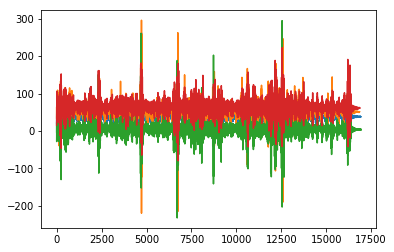

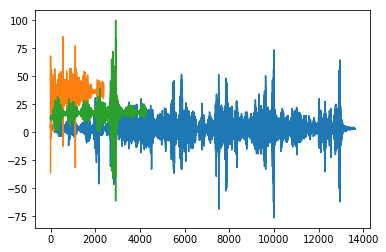

In [220]:
plot_nodes(1)

In [30]:
nodes

[9, 8, 7, 6]

In [31]:
#drop trains less than 7 seconds
#matches with more than 4 nodes: find median lengths instead of dropping
#misdetection due to close trains
#given date and time find trains
#band pass filter: 2Hz - 40Hz
